In [117]:
# import required libraries
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [58]:
# load and read dataset
dataset = pd.read_csv('stock.csv')
dataset.head()

,Unnamed: 0,Date,Last,Opening,High,Low,Vol.,Var. %,category
0,0,04-12-2021,3.50,3.57,3.64,3.46,1570000.0,-1.55,negative
1,1,04-09-2021,3.56,3.52,3.57,3.52,666030.0,1.14,positive
2,2,04-08-2021,3.52,3.45,3.54,3.45,882540.0,1.59,positive
3,3,04-07-2021,3.46,3.43,3.49,3.43,508330.0,0.87,positive
4,4,04-06-2021,3.43,3.44,3.49,3.43,809460.0,0.59,positive


In [59]:
# display columns
dataset.columns

Index(['Unnamed: 0', 'Date', 'Last', 'Opening', 'High', 'Low', 'Vol.',
       'Var. %', 'category'],
      dtype='object')

In [60]:
# remove first column
dataset = dataset.drop(['Unnamed: 0', 'Date'], axis = True)

In [61]:
dataset.head()

,Last,Opening,High,Low,Vol.,Var. %,category
0,3.50,3.57,3.64,3.46,1570000.0,-1.55,negative
1,3.56,3.52,3.57,3.52,666030.0,1.14,positive
2,3.52,3.45,3.54,3.45,882540.0,1.59,positive
3,3.46,3.43,3.49,3.43,508330.0,0.87,positive
4,3.43,3.44,3.49,3.43,809460.0,0.59,positive


In [62]:
# find null values
dataset.isnull().sum()

Last        0
Opening     0
High        0
Low         0
Vol.        0
Var. %      0
category    0
dtype: int64

In [63]:
# descriptive statistics
dataset.describe()

,Last,Opening,High,Low,Vol.,Var. %
count,1875.000000,1875.000000,1875.000000,1875.000000,1.875000e+03,1875.000000
mean,5.220325,5.222336,5.282341,5.156763,7.199550e+05,-0.005232
std,2.602547,2.601227,2.625503,2.573678,6.791061e+05,1.985541
min,1.800000,1.800000,1.820000,1.730000,4.182000e+04,-21.680000
25%,2.880000,2.880000,2.920000,2.840000,3.650900e+05,-0.910000
50%,5.070000,5.080000,5.110000,5.030000,5.381700e+05,0.000000
75%,7.530000,7.530000,7.650000,7.445000,8.484250e+05,0.930000
max,10.490000,10.450000,10.640000,10.390000,1.106000e+07,11.350000


In [64]:
# find datatypes
dataset.dtypes

Last        float64
Opening     float64
High        float64
Low         float64
Vol.        float64
Var. %      float64
category     object
dtype: object

In [65]:
# unique values in cateogry
dataset['category'].value_counts()

category
negative    867
positive    864
neutral     144
Name: count, dtype: int64

In [66]:
dataset['category']

0       negative
1       positive
2       positive
3       positive
4       positive
          ...   
1870    negative
1871    positive
1872    negative
1873    positive
1874    negative
Name: category, Length: 1875, dtype: object

In [67]:
# category mapping
category_map = {'negative': 0, 'neutral': 1, 'positive': 2}

dataset['category'] = dataset['category'].replace(category_map)

In [68]:
dataset['category']

0       0
1       2
2       2
3       2
4       2
       ..
1870    0
1871    2
1872    0
1873    2
1874    0
Name: category, Length: 1875, dtype: int64

In [69]:
dataset.head()

,Last,Opening,High,Low,Vol.,Var. %,category
0,3.50,3.57,3.64,3.46,1570000.0,-1.55,0
1,3.56,3.52,3.57,3.52,666030.0,1.14,2
2,3.52,3.45,3.54,3.45,882540.0,1.59,2
3,3.46,3.43,3.49,3.43,508330.0,0.87,2
4,3.43,3.44,3.49,3.43,809460.0,0.59,2


In [70]:
# find unique values in category column
dataset['category'].value_counts()

category
0    867
2    864
1    144
Name: count, dtype: int64

In [71]:
# find length of dataset
len(dataset)

1875

In [73]:
# find correlation wrt category column
dataset.corr()['category']

Last        0.036741
Opening     0.014012
High        0.025746
Low         0.026867
Vol.       -0.020480
Var. %      0.701044
category    1.000000
Name: category, dtype: float64

In [76]:
# find unique values
dataset['category'].value_counts()

category
0    867
2    864
1    144
Name: count, dtype: int64

In [79]:
# now separate index
indx = dataset['category'].value_counts().index
indx

Index([0, 2, 1], dtype='int64', name='category')

In [81]:
# find values asscosiated with index
vals = dataset['category'].value_counts().values
vals

array([867, 864, 144], dtype=int64)

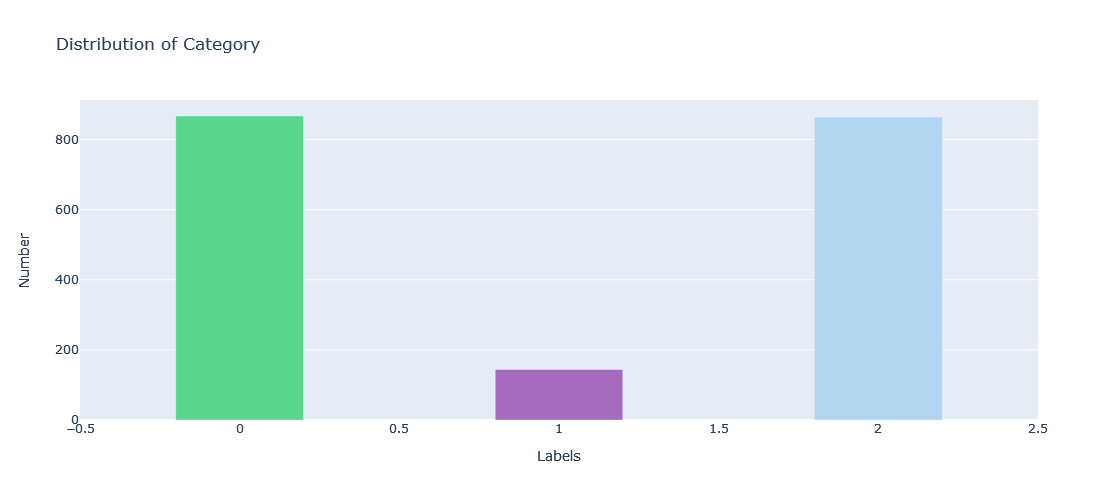

In [90]:
# now plot a bar graph to show distribution of target variable
fig = go.Figure()

# define colors
colors = ['#58d68d', '#aed6f1', '#a569bd']

# define category names
names = ['Negative', 'Positive', 'Neutral']

fig.add_trace(go.Bar(x = indx, y = vals, marker = dict(color = colors), width = 0.4, hovertext = names))
fig.update_layout(title = 'Distribution of Category', xaxis_title = 'Labels', yaxis_title = 'Number', height = 500)
fig.show()

## Artificial Neural Network

In [100]:
# distribute data into dependent and independent sets
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
x.head()

,Last,Opening,High,Low,Vol.,Var. %
0,3.50,3.57,3.64,3.46,1570000.0,-1.55
1,3.56,3.52,3.57,3.52,666030.0,1.14
2,3.52,3.45,3.54,3.45,882540.0,1.59
3,3.46,3.43,3.49,3.43,508330.0,0.87
4,3.43,3.44,3.49,3.43,809460.0,0.59


In [107]:
# scale x values
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [108]:
# now split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [109]:
# prepare model
model = Sequential()

# input layer
model.add(Dense(units = 6, input_dim = 6, input_shape = (6, ), kernel_initializer = 'uniform'))

# first input layer
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'uniform'))

# second input layer
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'uniform'))

# third input layer
model.add(Dense(units = 128, activation = 'tanh', kernel_initializer = 'uniform'))

# output layer
model.add(Dense(units = 3, activation = 'softmax', kernel_initializer = 'uniform'))

# summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6)                 42        
                                                                 
 dense_6 (Dense)             (None, 128)               896       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 3)                 387       
                                                                 
Total params: 34349 (134.18 KB)
Trainable params: 34349 (134.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
# compile the model
model.compile(loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [111]:
# now train model
model.fit(x_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
150/150 [==============================] - 2s 3ms/step - loss: 0.7020 - accuracy: 0.6867
Epoch 2/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0891 - accuracy: 0.9687
Epoch 3/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9907
Epoch 4/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9927
Epoch 5/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9860
Epoch 6/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9933
Epoch 7/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9987
Epoch 8/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9940
Epoch 9/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9987
Epoch 10/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000

In [112]:
# evaluate for training data
model.evaluate(x_train, y_train)

47/47 [==============================] - 1s 2ms/step - loss: 0.0011 - accuracy: 1.0000


[0.0011071381159126759, 1.0]

In [113]:
# evaluate for testing data
model.evaluate(x_test, y_test)

12/12 [==============================] - 0s 4ms/step - loss: 6.2633e-04 - accuracy: 1.0000


[0.0006263282848522067, 1.0]

In [116]:
# now predict unseen data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred

12/12 [==============================] - 0s 2ms/step


array([0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0,
       2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1,
       1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 1, 2,
       2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0,

In [119]:
# find accuracy
print("Model's accuracy is", accuracy_score(y_pred, y_test))

Model's accuracy is 1.0
